<a href="https://colab.research.google.com/github/PranavShekhar13/MercuryAI/blob/main/RealTimeImage%26Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transfer Learning for Real Time Video and Image Enhancement - Super Resolution .**

**1. Cloning our reference directory and pre trained model directory from GitHub.**

In [1]:
!git clone https://github.com/krasserm/super-resolution

Cloning into 'super-resolution'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 388 (delta 0), reused 1 (delta 0), pack-reused 385
Receiving objects: 100% (388/388), 47.38 MiB | 37.52 MiB/s, done.
Resolving deltas: 100% (200/200), done.


 *We will be using Super Resolution as our pre trained model for Transfer Learning. Super Resolution is a GAN - a generative adversarial network (GAN) for image super-resolution (SR). It is a framework capable of inferring photo-realistic natural images for 4x upscaling factors. A representation of the GAN architecture can be seen below :-*
 
 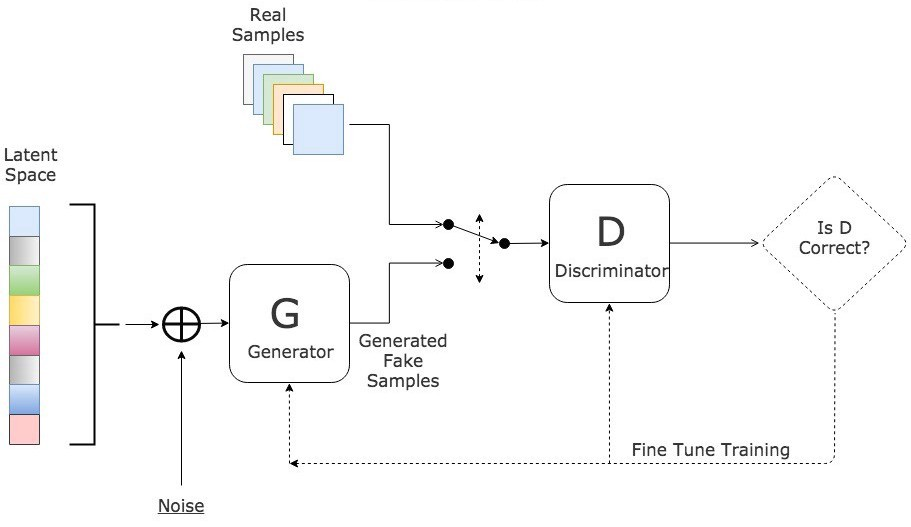


**2. Changing our directory to the cloned directory.**

In [2]:
cd super-resolution

/content/super-resolution


**3. Downloading our pretrained weights.**

**Use my Google Drive link to download the Super Resolution Pretrained Weights - [Weights](https://drive.google.com/drive/folders/1eb9VCgNFcuuWWEd8HdysX5-FtIX8guPf?usp=sharing)**

**Note :- You can also add it as a shortcut to your drive and mount your drive to this notebook to avoid uploading and downloading time.**

**4. Loading our pretrained weights.**

In [3]:
!tar xvfz /content/weights-srgan.tar.gz

weights/srgan/gan_discriminator.h5
weights/srgan/gan_generator.h5
weights/srgan/pre_generator.h5


# **Super Resolution Model - Image Enhancement**

**5. Importing the required Libraries.**

In [4]:
import timeit   #To measure execution time
import cv2      #OpenCV Computer Vision Library to interact with images and videos
import os       #To interact with the os with files and directories - here in the Google Colab Environment
import numpy as np                   #To interact with image arrays and frames of videos
from model import resolve_single     #Functional module of pretrained model
from utils import load_image, plot_sample   #To load images and plot the difference after super resolution
from model.srgan import generator           #Image generator module for our Super Resolution GAN Model

**6. Source Code Implementation.**

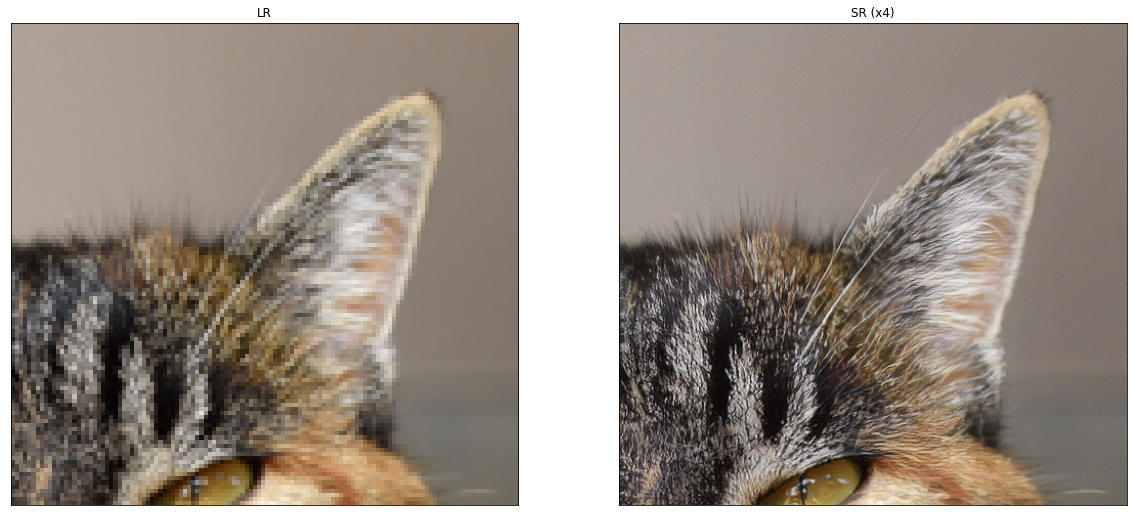

In [5]:
model = generator()                                    #Creating an instance of our GAN generator model.
model.load_weights('weights/srgan/gan_generator.h5')   #Loading the weights of the pretrained Super Resolution GAN generator to our generator instance.

lr = load_image('demo/0869x4-crop.png')    #Creating an instance of our Low Resolution Image.
sr = resolve_single(model, lr)             #Creating an instance of our Super Resolved Image by calling the resolve_single function with our pre-trained model and low resolution image as arguments.

plot_sample(lr, sr)            #Ploting the images to see the difference.

*So we can clearly see the enhanced image with our pretrained model in real time. This would work for any image and is working fine with all resolutions and ratios. Now for the real time video enhancement we will have to make a strategy.*

# **Super Resolution Model - Video Enhancement**

**7. Video Enhancement Strategy - We will have to split the video into multiple image frames and throw all the frames to our model for new learning of the freezed weights(Transfer Learning) and get the super resolved frames back as the output and combine these frames to get our enhanced video.**

*Our Strategy can be visualized from the below diagram :-*

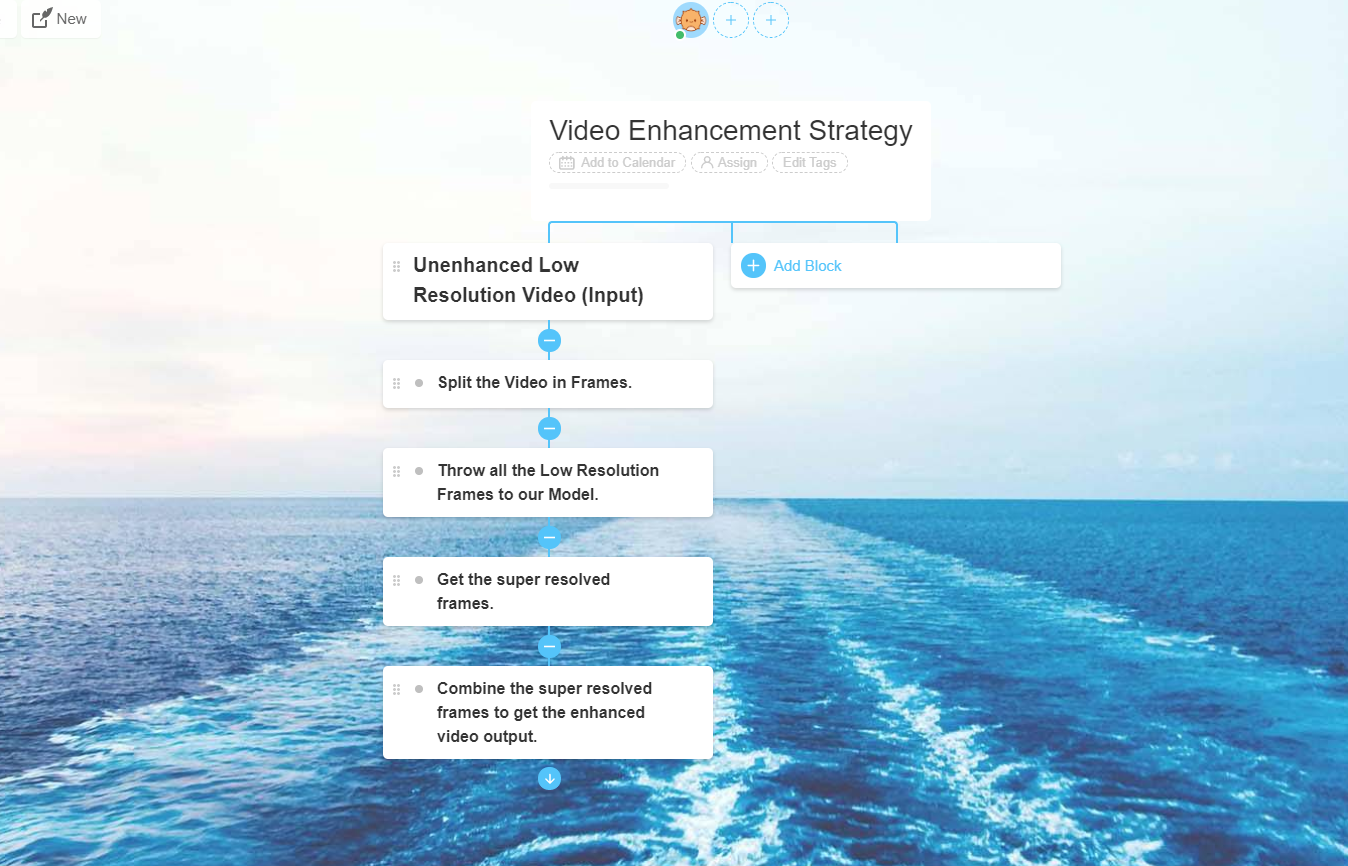

**8. Source Code Implementation of our Strategy.**

In [10]:
input = cv2.VideoCapture("/content/input_1_.3gp")    #Read the input low resolution video  
fps = input.get(cv2.CAP_PROP_FPS)                 #Get the Frames Per Second of our input video
print(fps)                                        #Print the frames per second of the input video

#try and exception block to catch exceptions
try:
      
    
    if not os.path.exists('data'):   #if there is no directory named 'data'
        os.makedirs('data')          #then make a dir named 'data'
  
# if not created then print error message
except OSError:
    print ('Error: Creating directory of data') 
  
#Now we will extract the frames from the video according to our strategy.

currentframe = 0  #intialize number of current frames to zero
arr_img = []      #intialize a list for storing low resolution image frames 
while(True): 
      
    # reading from current frame 
    ret,frame = input.read() 

    if ret:  #if cuurent frame exists and return value is true
        
        name = './data/frame' + str(currentframe).zfill(3) + '.jpg'    #then add that frame as a jpg image to the data directory with the name as number.jpg
        print ('Creating...' + name)                                   #zfill(3) is used to add zeroes left to the string of the jpg file created. 
  
        
        cv2.imwrite(name, frame)  #write or save the file created on the current frame
  
        
        currentframe += 1        #increase the frame count for the next frame to be saved as an image file
        
        arr_img.append(name)     #storing the names of the saved image frames in the intialized list
    
    else:        #if frame is not found or ret is false 
        break    #then break the infinite loop
#print(arr_img)

start = timeit.default_timer()        #start the timer from the timeit library to get the execution time.
model = generator()                   #create an instance of our GAN generator model
model.load_weights('weights/srgan/gan_generator.h5')   #Loading the weights of the pretrained Super Resolution GAN generator to our generator instance.


arr_output=[]       #Intialize an empty list to store the names of the Super Resolved Images.
print(len(arr_img)) #Get the Length of the list containing nmaes of low resolution images
n= len(arr_img)     #Intialize the length of the list containing low resolution images to a variable n.



#Throwing the extracted frames to our model.

for i in range(n):               #Loop through the array containing names of the low resolution images
  lr = load_image(arr_img[i])    #Load the images one by one of the array containing low resolution images
  sr = resolve_single(model, lr) #Super Resolve the images one by one by throwing them to our model.
  #plot_sample(lr, sr)
  
  arr_output.append(sr)          #Store the super resolved images in the output array
stop = timeit.default_timer()    #Stop the execution timer.
#print(arr_output)

print("time : ", stop-start)     #Print the execution time

# Release all space and windows once done
 
input.release()                 #Release the input video
cv2.destroyAllWindows()         

20.0
Creating..../data/frame000.jpg
Creating..../data/frame001.jpg
Creating..../data/frame002.jpg
Creating..../data/frame003.jpg
Creating..../data/frame004.jpg
Creating..../data/frame005.jpg
Creating..../data/frame006.jpg
Creating..../data/frame007.jpg
Creating..../data/frame008.jpg
Creating..../data/frame009.jpg
Creating..../data/frame010.jpg
Creating..../data/frame011.jpg
Creating..../data/frame012.jpg
Creating..../data/frame013.jpg
Creating..../data/frame014.jpg
Creating..../data/frame015.jpg
Creating..../data/frame016.jpg
Creating..../data/frame017.jpg
Creating..../data/frame018.jpg
Creating..../data/frame019.jpg
Creating..../data/frame020.jpg
Creating..../data/frame021.jpg
Creating..../data/frame022.jpg
Creating..../data/frame023.jpg
Creating..../data/frame024.jpg
Creating..../data/frame025.jpg
Creating..../data/frame026.jpg
Creating..../data/frame027.jpg
Creating..../data/frame028.jpg
Creating..../data/frame029.jpg
Creating..../data/frame030.jpg
Creating..../data/frame031.jpg
Cre

**9. Saving our super resolved images to output directory**

In [11]:
from keras.preprocessing.image import load_img      #To Load the Super Resolved Image
from keras.preprocessing.image import img_to_array  #To convert the Super Resolved Image to array.
from keras.preprocessing.image import array_to_img  #To convert the array to Image.
from keras.preprocessing.image import save_img      #To save the Super Resolved Image to Output Directory.


os.makedirs("output_images")  #Making a directory to store super resolved frames in image format


s_res= []                    #Initialization of an empty list to store the names of Super resolved images


for j in range(len(arr_output)):     #Loop through output super resolved images list
  out_name = '/content/super-resolution/output_images/frame' + str(j).zfill(3) + '.jpg'   #Output File name of the images one by one
  img_pil = array_to_img(arr_output[j])  #Convert the array to image 
  img1 = save_img(out_name, img_pil)     #Save the super resolved iamges to the decided directory
  s_res.append(out_name)                 #Append to the list of the Super Resplved Images one by one.

**10. Converting our super resolved frames to the enhanced video output.**

In [12]:
import cv2           #OpenCV Computer Vision Library to interact with images and videos
import numpy as np   #To interact with image arrays and frames of videos


for i in range(len(s_res)):       #Loop through the length of the super resolved images list
    filename=s_res[i]             #Intialize the File Name to the current number of the list
    #reading each file
    img = cv2.imread(filename)    #Read the Super Resolved Image File
    height, width, layers = img.shape  #Assign Values to variables of the resolution of the image respectively 
    size = (width,height)              #Assign the size of the image

fps = 20     
               #Calculate fps(Frames Per Second) value using (No. of frames)/Video_duration in seconds  

#Creation of output video               
out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps , size)   

#Writing Frames into video
for i in range(len(s_res)):
    out.write(cv2.imread(s_res[i]))
out.release()

**11. Now let's compare the results :-**

**The input low resolution video:-**

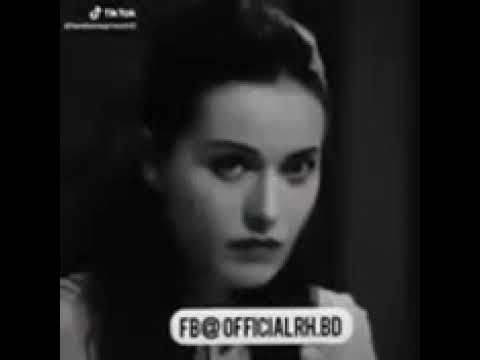

In [15]:
from IPython.display import YouTubeVideo
id ='Et3uuDG7AV4'
YouTubeVideo(id=id, width=900, height=400)

**12. The Output Enhanced High Resolution Video:-**

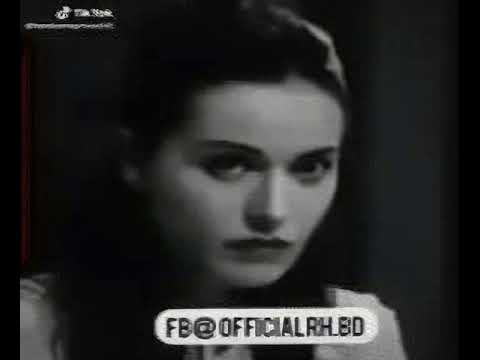

In [16]:
from IPython.display import YouTubeVideo
id ='X-AHp8p7eI4'
YouTubeVideo(id=id, width=900, height=400)

**13. So Finally we achieved our required goal and performed accordingly to the requirements of this project. You can see the difference yourself.**